# LAB 4

# Part 1 - Objectives
1.	Apply Logistic Regression  and Decision Tree classification algorithms to the Forest Cover types dataset
2.	Use k-fold cross validation to identify the best way to rescale and preprocess the data
3.	Use k-fold cross validation to identify the parameters that optimize performance (generalization) for each method
4.	Compare the accuracy and identify correlation between the outputs of the two methods


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
import time

# Dataset 
Load the Covtype dataset, which contains 581,012 samples with 54 features each, distributed among 6 classes. The goal of this dataset is to predict forest cover type from cartographic variables only (no remotely sensed data). 

In [2]:
X, y = fetch_covtype(return_X_y=True,shuffle=True)
y[y > 2] = 3

Here we select 5,000 samples for training and 1,000 for testing. To actually reproduce the results in the original Tensor Sketch paper, select 100,000 for training.

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=5_000,
                                                    test_size=1_000,
                                                    random_state=2)

In [4]:
from collections import Counter
Counter(list(y_test))

Counter({1: 354, 2: 475, 3: 171})

# Logistic regression

In [5]:
from sklearn.pipeline import Pipeline
LR_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier',LogisticRegression(multi_class='ovr',random_state=15, max_iter=1_000))
        ])

In [6]:
LR_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__C', 'classifier__class_weight', 'classifier__dual', 'classifier__fit_intercept', 'classifier__intercept_scaling', 'classifier__l1_ratio', 'classifier__max_iter', 'classifier__multi_class', 'classifier__n_jobs', 'classifier__penalty', 'classifier__random_state', 'classifier__solver', 'classifier__tol', 'classifier__verbose', 'classifier__warm_start'])

In [7]:
scalers_to_test = [StandardScaler(), RobustScaler(), MinMaxScaler()]

params = {'scaler': scalers_to_test,
        'classifier__C': np.linspace(0.01,15,10)}

In [8]:
# Find best parameters using grid search
LR_clf = GridSearchCV(LR_pipe, params, cv=3,verbose=1)
#Fit model
LR_clf.fit(X_train,y_train)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:   38.7s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=1000,
                                                           multi_class='ovr',
      

In [9]:
print(LR_clf.best_params_)

{'classifier__C': 13.334444444444445, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}


In [10]:
print("Training score = ", LR_clf.score(X_train, y_train))
print("Testing score = ", LR_clf.score(X_test, y_test))

Training score =  0.738
Testing score =  0.746


In [11]:
LR_clf.predict_proba(X_test)

array([[0.38774391, 0.56304842, 0.04920767],
       [0.28972137, 0.67971377, 0.03056485],
       [0.07907396, 0.89007501, 0.03085103],
       ...,
       [0.00098483, 0.04597773, 0.95303744],
       [0.30314474, 0.68119837, 0.01565689],
       [0.03305045, 0.47755607, 0.48939347]])

# Decision Tree

In [12]:
DT_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier',DecisionTreeClassifier(random_state=15))
        ])

In [13]:
DT_pipe.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__ccp_alpha', 'classifier__class_weight', 'classifier__criterion', 'classifier__max_depth', 'classifier__max_features', 'classifier__max_leaf_nodes', 'classifier__min_impurity_decrease', 'classifier__min_impurity_split', 'classifier__min_samples_leaf', 'classifier__min_samples_split', 'classifier__min_weight_fraction_leaf', 'classifier__presort', 'classifier__random_state', 'classifier__splitter'])

In [14]:
params = {'scaler': scalers_to_test,
        'classifier__max_depth': [2, 4,6, 8],\
        'classifier__criterion': ['gini', 'entropy'],
        'classifier__max_features': [2, 5,10,15,20,25,30,35,40,45,50]}

In [15]:
# Find best parameters using grid search
DT_clf = GridSearchCV(DT_pipe, params, cv=3,verbose=1)
#Fit model
DT_clf.fit(X_train,y_train)

Fitting 3 folds for each of 264 candidates, totalling 792 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 792 out of 792 | elapsed:   16.8s finished


GridSearchCV(cv=3, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('classifier',
                                        DecisionTreeClassifier(ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=None,
                                                               max_features=None,
                                                               max_leaf_nodes=None,
                                                               min_impurity_decrease=0.0,
                              

In [16]:
print(DT_clf.best_params_)

{'classifier__criterion': 'gini', 'classifier__max_depth': 8, 'classifier__max_features': 45, 'scaler': MinMaxScaler(copy=True, feature_range=(0, 1))}


In [17]:
print("Training score = ", DT_clf.score(X_train, y_train))
print("Testing score = ", DT_clf.score(X_test, y_test))

Training score =  0.8058
Testing score =  0.754


# Compare classifiers

## Generate classifiers output

In [18]:
#generate predictions:
LR_pred = LR_clf.predict(X_test)
#generate proba:
LR_proba = LR_clf.predict_proba(X_test)
LR_proba

array([[0.38774391, 0.56304842, 0.04920767],
       [0.28972137, 0.67971377, 0.03056485],
       [0.07907396, 0.89007501, 0.03085103],
       ...,
       [0.00098483, 0.04597773, 0.95303744],
       [0.30314474, 0.68119837, 0.01565689],
       [0.03305045, 0.47755607, 0.48939347]])

In [19]:
#generate predictions:
DT_pred = DT_clf.predict(X_test)

#generate proba:
DT_proba = DT_clf.predict_proba(X_test)
DT_proba

array([[0.19680511, 0.77635783, 0.02683706],
       [0.05683837, 0.79040853, 0.15275311],
       [0.19680511, 0.77635783, 0.02683706],
       ...,
       [0.        , 0.        , 1.        ],
       [0.20192308, 0.79807692, 0.        ],
       [0.05683837, 0.79040853, 0.15275311]])

## Visualization

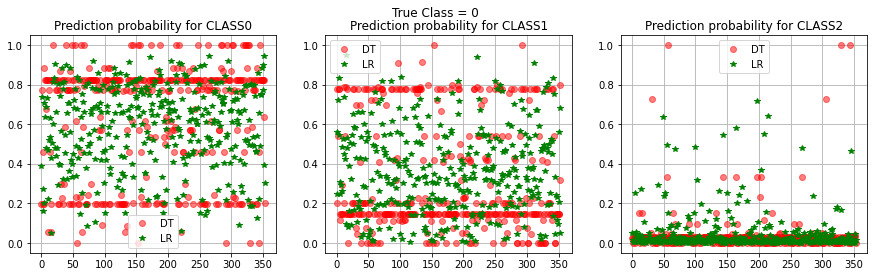

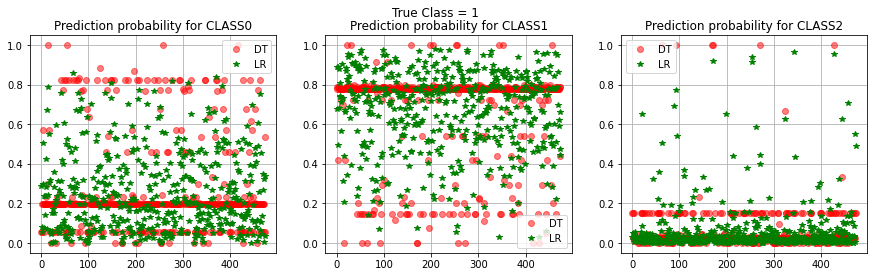

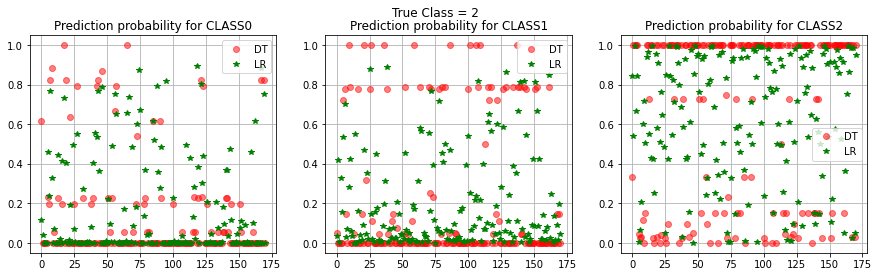

In [20]:

for t in np.unique(y_test):
  plt.figure(figsize=(15,4))
  plt.suptitle('True Class = ' + str(t-1))
  mask = y_test == t
  y_m = y_test[mask]
  DT_proba_m = DT_proba[mask,:]
  LR_proba_m = LR_proba[mask,:]
  for c in np.unique(y_test):
    plt.subplot(1,3,c)
    plt.plot(np.arange(len(DT_proba_m)),DT_proba_m[:,c-1],'ro',alpha=0.5)
    plt.plot(np.arange(len(LR_proba_m)),LR_proba_m[:,c-1],'g*')
    plt.legend(['DT','LR'])
    plt.title('Prediction probability for CLASS'+str(c-1))
    plt.grid()
  plt.show()

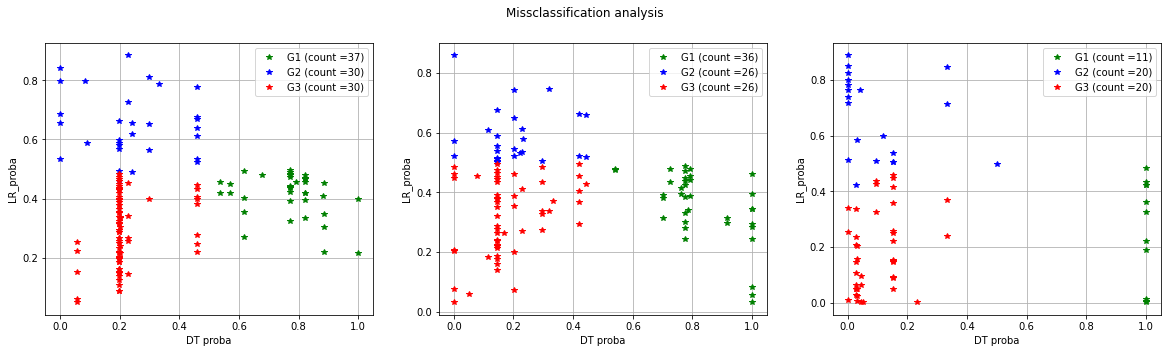

In [21]:
plt.figure(figsize=(20,5))
plt.suptitle('Missclassification analysis')
for c in np.unique(y_test):
  plt.subplot(1,3,c)
  mask = y_test == c
  DT_pr = DT_proba[mask,:]
  LR_pr = LR_proba[mask,:]
  # Samples misclassified by LR and correctly classified by DT
  G1 = np.logical_and(LR_pred[mask] != y_test[mask], DT_pred[mask] == y_test[mask]) 

  # Samples misclassified by DT and correctly classified by LR
  G2 = np.logical_and(LR_pred[mask] == y_test[mask], DT_pred[mask] != y_test[mask]) 

  # Samples misclassified by LR and  DT
  G3 = np.logical_and(LR_pred[mask] != y_test[mask], DT_pred[mask] != y_test[mask]) 
  plt.plot(DT_pr[G1,c-1],LR_pr[G1,c-1],'g*',label='G1 (count ='+str(len(LR_pr[G1,c-1]))+')')
  plt.plot(DT_pr[G2,c-1],LR_pr[G2,c-1],'b*',label='G2 (count ='+str(len(LR_pr[G2,c-1]))+')')
  plt.plot(DT_pr[G3,c-1],LR_pr[G3,c-1],'r*',label='G3 (count ='+str(len(LR_pr[G2,c-1]))+')')
  plt.grid()
  plt.legend()
  plt.xlabel('DT proba')
  plt.ylabel('LR_proba')

# Part 2 - Analyze and Visualize classification outputs using PCA and TSNE

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

### Load and scale data (IRIS dataset)
This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length, stored in a 150x4 numpy.ndarray

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [23]:
#Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=100,
                                                    test_size=50,
                                                    random_state=2)
print(X_train.shape, X_test.shape)

# Standardizing the features
scaler= StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

(100, 4) (50, 4)


### Create a logistic regression model

In [24]:
#Train the model
model = LogisticRegression(multi_class='ovr')
model.fit(X_train, y_train) #Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
#Evaluate
print("Training score = ", model.score(X_train, y_train))
print("Testing score = ", model.score(X_test, y_test))

Training score =  0.92
Testing score =  0.92


### Visualize and Analyze results - PCA

Principal Component Analysis (PCA) is an unsupervised, non-parametric statistical technique primarily used for dimensionality reduction in machine learning. ... PCA can also be used to filter noisy datasets, such as image compression. The first principal component expresses the most amount of variance.

In [26]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

#### Explained Variance
The explained variance tells you how much information (variance) can be attributed to each of the principal components. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the variance (information) when you do this. By using the attribute explained_variance_ratio_, you can see that the first principal component contains 72.77% of the variance and the second principal component contains 22.52% of the variance. Together, the two components contain ~ 95% of the information.

In [27]:
pca.explained_variance_ratio_

array([0.72948262, 0.22412886])

In [28]:
# Generate predictions
y_pred = model.predict(X_test)

In [29]:
from matplotlib.colors import ListedColormap
colors = ['g','k','r']
newcmp = ListedColormap(colors)

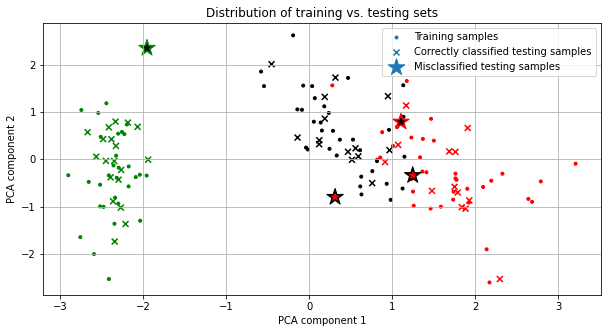

In [30]:
plt.figure(figsize = (10,5))
mask0 = y_pred == y_test
mask1 = y_pred != y_test
plt.scatter(X_train_pca[:,0],X_train_pca[:,1], c=y_train,marker='.',cmap=newcmp)
plt.scatter(X_test_pca[mask0,0],X_test_pca[mask0,1], c=y_test[mask0],marker='x',cmap=newcmp)
plt.scatter(X_test_pca[mask1,0],X_test_pca[mask1,1], c=y_test[mask1],marker='*',cmap=newcmp ,s=300)
plt.scatter(X_test_pca[mask1,0],X_test_pca[mask1,1], c=y_pred[mask1],marker='*',cmap=ListedColormap(np.array(colors)[np.unique(y_pred[mask1])]) ,s=50)
plt.legend(['Training samples', 'Correctly classified testing samples', 'Misclassified testing samples'])
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')
plt.title('Distribution of training vs. testing sets')
plt.grid()

In [31]:
y_test[mask1], y_pred[mask1]

(array([1, 0, 1, 2]), array([2, 1, 2, 1]))

### Visualize and Analyze results - t-SNE
t-Distributed Stochastic Neighbor Embedding (t-SNE) is an unsupervised, non-linear technique primarily used for data exploration and visualizing high-dimensional data. In simpler terms, t-SNE gives you a feel or intuition of how the data is arranged in a high-dimensional space.

In [32]:
from sklearn.manifold import TSNE

# fit
X = TSNE(n_components=2).fit_transform(X)

#Recover original train-test split into train and test
X_train_tsne, X_test_tsne, y_train, y_test = train_test_split(X, y, train_size=100,
                                                    test_size=50,
                                                    random_state=2)



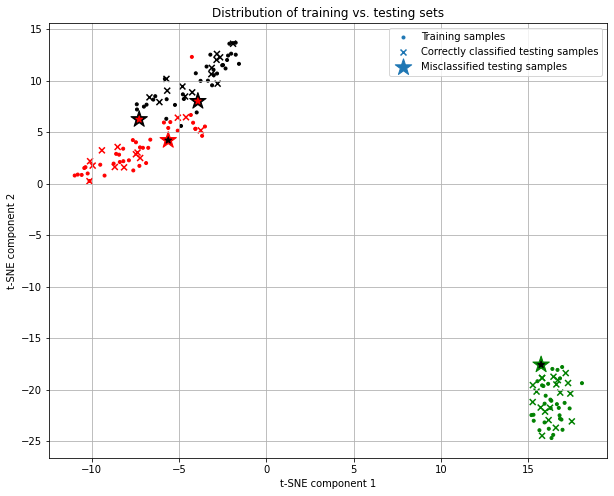

In [33]:
plt.figure(figsize = (10,8))
mask0 = y_pred == y_test
mask1 = y_pred != y_test
plt.scatter(X_train_tsne[:,0],X_train_tsne[:,1], c=y_train,marker='.',cmap=newcmp)
plt.scatter(X_test_tsne[mask0,0],X_test_tsne[mask0,1], c=y_test[mask0],marker='x',cmap=newcmp)
plt.scatter(X_test_tsne[mask1,0],X_test_tsne[mask1,1], c=y_test[mask1],marker='*',cmap=newcmp ,s=300)
plt.scatter(X_test_tsne[mask1,0],X_test_tsne[mask1,1], c=y_pred[mask1],marker='*',cmap=ListedColormap(np.array(colors)[np.unique(y_pred[mask1])]) ,s=50)
plt.legend(['Training samples', 'Correctly classified testing samples', 'Misclassified testing samples'])
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.title('Distribution of training vs. testing sets')
plt.grid()